# Markov-Entscheidungsprozess-Simulation

In [ ]:
%load_ext autoreload
%autoreload 2
%pip install numpy funcy matplotlib

In [63]:
import numpy as np
import funcy as fy
import matplotlib.pyplot as plt
from IPython.display import display, HTML

from Uebung_09 import Board, simulate, repeat_simulate, random_policy, oracle_policy, expected_utility_policy

In [59]:
def board_to_html(board) -> str:
  out = "<table style='margin:2px;'>"

  for y in range(board.K):
    out += "<tr>"
    for x in range(board.K):
      v = 0
      c = "white"
      if board.player == (y,x):
        c = "orange"
        v = board.points
      else:
        for g in board.ghosts:
          if g == (y,x):
            v += 1
            c = "red"
      out += "<td style='width:2em;height:2em;font-size:0.8em;background-color:" + c + ";color:black;text-align:center;margin:0;padding:0;border:1px solid black !important;'>"
      if c != "white":
        out += str(v)
      out += "</td>"
    out += "</tr>"

  out += "</table>"
  return out

def draw_board(board):
  display(HTML(board_to_html(board)))

def draw_boards(boards: list[Board]):
  out = "<div style='position:relative;display:flex;overflow:auto;flex-wrap:wrap;'>"
  for board in boards:
    out += board_to_html(board)
  out += "</div>"
  display(HTML(out))

def plot_points(point_series: dict[str, np.array]):
  fig, ax = plt.subplots()
  for k, points in point_series.items():
    ax.plot(np.arange(points.shape[0]), points, label=k)
    ax.text(int(points.shape[0] * 0.98), points[-1]-5, str(points[-1]), ha="right")
  ax.legend()
  ax.set_ylabel("Ø kummulierter Gewinn")
  ax.set_xlabel("Zeitschritte")
  plt.savefig("uebung_09_plot.pdf")
  plt.show()

## Exemplarische Spielverläufe mit unterschiedlichen Strategien

In [73]:
print("20 Schritte mit zufälligen Zügen:")
draw_boards(simulate(Board(), random_policy(seed=0), steps=20))
print("20 Schritte mit greedy Zügen (Lookahead 1):")
draw_boards(simulate(Board(), oracle_policy(lookahead=1), steps=20))
print("20 Schritte mit EU-maximierenden Zügen (Lookahead 2):")
draw_boards(simulate(Board(), expected_utility_policy(), steps=20))
print("20 Schritte mit optimalen Zügen (Orakel mit Lookahead 2):")
draw_boards(simulate(Board(), oracle_policy(), steps=20))

20 Schritte mit zufälligen Zügen:


1,1,1,1
,,,
,,,
0,,,
1,1,1,
,1,,
,,,
,0,,
,2,,
,1,,
,1,,


20 Schritte mit greedy Zügen (Lookahead 1):


1,1,1,1
,,,
,,,
0,,,
1,1,,1
1,,,
0,,,
,,,
1,,,2
1,1,,
,,,


20 Schritte mit EU-maximierenden Zügen (Lookahead 2):


1,1,1,1
,,,
,,,
0,,,
1,1,,1
1,,,
0,,,
,,,
1,,,2
1,1,,
,,,


20 Schritte mit optimalen Zügen (Orakel mit Lookahead 2):


1,1,1,1
,,,
,,,
0,,,
1,1,,1
1,,,
0,,,
,,,
1,,,2
1,1,,
,,,


## Durchschnittlicher Gewinn nach 1000 Zeitschritten

In [13]:
mean_results = dict(
  Zufall=repeat_simulate(random_policy, steps=1000, repeats=100),
  Greedy=repeat_simulate(fy.partial(oracle_policy, lookahead=1), steps=1000, repeats=100),
  EU=repeat_simulate(expected_utility_policy, steps=1000, repeats=100),
  Orakel=repeat_simulate(oracle_policy, steps=1000, repeats=100)
)

In [70]:
for name, points in mean_results.items():
  print(f"{name}: {points[-1]}")

Zufall: 198.97
Greedy: 441.28
EU: 678.26
Orakel: 728.77


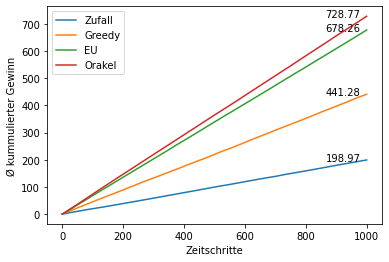

In [62]:
plot_points(mean_results)